In [276]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [277]:
import os

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import seaborn as sns
import sklearn as skl

import IPython.display as ipd
from src.plots import *
from src import utils

In [260]:
plt.style.use('Solarize_Light2')

In [197]:
# Load metadata and features.
tracks = utils.load('data/fma_metadata/tracks.csv')
genres = utils.load('data/fma_metadata/genres.csv')
features = utils.load('data/fma_metadata/features.csv')
echonest = utils.load('data/fma_metadata/echonest.csv')

np.testing.assert_array_equal(features.index, tracks.index)
assert echonest.index.isin(tracks.index).all()

tracks.shape, genres.shape, features.shape, echonest.shape

((106574, 52), (163, 4), (106574, 518), (13129, 249))

In [288]:
tracks.track.head()

,bit_rate,comments,composer,date_created,date_recorded,duration,favorites,genre_top,genres,genres_all,information,interest,language_code,license,listens,lyricist,number,publisher,tags,title
track_id,,,,,,,,,,,,,,,,,,,,
2,256000,0,NaN,2008-11-26 01:48:12,2008-11-26,168,2,Hip-Hop,[21],[21],NaN,4656,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1293,NaN,3,NaN,[],Food
3,256000,0,NaN,2008-11-26 01:48:14,2008-11-26,237,1,Hip-Hop,[21],[21],NaN,1470,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,514,NaN,4,NaN,[],Electric Ave
5,256000,0,NaN,2008-11-26 01:48:20,2008-11-26,206,6,Hip-Hop,[21],[21],NaN,1933,en,Attribution-NonCommercial-ShareAlike 3.0 Inter...,1151,NaN,6,NaN,[],This World
10,192000,0,Kurt Vile,2008-11-25 17:49:06,2008-11-26,161,178,Pop,[10],[10],NaN,54881,en,Attribution-NonCommercial-NoDerivatives (aka M...,50135,NaN,1,NaN,[],Freeway
20,256000,0,NaN,2008-11-26 01:48:56,2008-01-01,311,0,NaN,"[76, 103]","[17, 10, 76, 103]",NaN,978,en,Attribution-NonCommercial-NoDerivatives (aka M...,361,NaN,3,NaN,[],Spiritual Level


In [198]:
tracks['track'].genre_top.value_counts()

Rock                   14182
Experimental           10608
Electronic              9372
Hip-Hop                 3552
Folk                    2803
Pop                     2332
Instrumental            2079
International           1389
Classical               1230
Jazz                     571
Old-Time / Historic      554
Spoken                   423
Country                  194
Soul-RnB                 175
Blues                    110
Easy Listening            24
Name: genre_top, dtype: int64

In [290]:
echonest.echonest

audio_features                                                    \
           acousticness danceability    energy instrumentalness  liveness   
track_id                                                                    
2              0.416675     0.675894  0.634476         0.010628  0.177647   
3              0.374408     0.528643  0.817461         0.001851  0.105880   
5              0.043567     0.745566  0.701470         0.000697  0.373143   
10             0.951670     0.658179  0.924525         0.965427  0.115474   
134            0.452217     0.513238  0.560410         0.019443  0.096567   
...                 ...          ...       ...              ...       ...   
124857         0.007592     0.790364  0.719288         0.853114  0.720715   
124862         0.041498     0.843077  0.536496         0.865151  0.547949   
124863         0.000124     0.609686  0.895136         0.846624  0.632903   
124864         0.327576     0.574426  0.548327         0.452867  0.075928   
124911         0.993606     0.499339  0.050622         0.945677  0.095965   

                                           metadata                       ...  \
         speechiness    tempo   valence  album_date           album_name  ...   
track_id                                                                  ...   
2           0.159310  165.922  0.576661         NaN                  NaN  ...   
3           0.461818  126.957  0.269240         NaN                  NaN  ...   
5           0.124595  100.260  0.621661         NaN                  NaN  ...   
10          0.032985  111.562  0.963590  2008-03-11    Constant Hitmaker  ...   
134         0.525519  114.290  0.894072         NaN                  NaN  ...   
...              ...      ...       ...         ...                  ...  ...   
124857      0.082550  141.332  0.890461         NaN                  NaN  ...   
124862      0.074001  101.975  0.476845         NaN                  NaN  ...   
124863      0.051517  129.996  0.496667         NaN                  NaN  ...   
124864      0.033388  142.009  0.569274         NaN                  NaN  ...   
124911      0.065189  119.965  0.204652  2009-10-23  Suicide Beauty Girl  ...   

         temporal_features                                                    \
                       214        215       216       217       218      219   
track_id                                                                       
2                -1.992303   6.805694  0.233070  0.192880  0.027455  0.06408   
3                -1.582331   8.889308  0.258464  0.220905  0.081368  0.06413   
5                -2.288358  11.527109  0.256821  0.237820  0.060122  0.06014   
10               -3.662988  21.508228  0.283352  0.267070  0.125704  0.08082   
134              -1.452696   2.356398  0.234686  0.199550  0.149332  0.06440   
...                    ...        ...       ...       ...       ...      ...   
124857           -1.721207   4.686078  0.213789  0.208800  0.007911  0.06395   
124862           -0.647897   1.282306  0.214586  0.181860  0.011247  0.06240   
124863           -0.771613   1.623510  0.180471  0.128185  0.010103  0.06222   
124864           -2.054143   7.927149  0.250178  0.219205  0.014851  0.06390   
124911           -0.215639  -0.584081  0.603893  0.505940  0.608585  0.06830   

                                                      
                220       221        222         223  
track_id                                              
2          3.676960   3.61288  13.316690  262.929749  
3          6.082770   6.01864  16.673548  325.581085  
5          5.926490   5.86635  16.013849  356.755737  
10         8.414010   8.33319  21.317064  483.403809  
134       11.267070  11.20267  26.454180  751.147705  
...             ...       ...        ...         ...  
124857     2.040730   1.97678   8.144532  147.040405  
124862     0.922360   0.85996   1.794739    6.321268  
124863     2.251160   2.18894   5.578341   89.180328  
124864     1.4

In [199]:
echonest_tracks = tracks.loc[echonest.index].join(echonest['echonest'][['audio_features', 'temporal_features']])

In [200]:
features_echonest = echonest['echonest'][['audio_features', 'temporal_features']].join(features.loc[echonest.index])

/Users/alextsai/anaconda3/lib/python3.7/site-packages/pandas/core/reshape/merge.py:618: UserWarning: merging between different levels can give an unintended result (2 levels on the left, 3 on the right)
  warnings.warn(msg, UserWarning)


In [201]:
full_df = echonest_tracks.join(features.loc[echonest.index])

In [202]:
full_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13129 entries, 2 to 124911
Columns: 802 entries, ('album', 'comments') to ('zcr', 'std')
dtypes: category(6), datetime64[ns](7), float64(752), int64(15), object(22)
memory usage: 81.2+ MB


In [203]:
[row[0] for row in  features.columns]

['chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma_cens',
 'chroma

In [204]:
[row[0] for row in echonest['echonest'].columns]

['audio_features',
 'audio_features',
 'audio_features',
 'audio_features',
 'audio_features',
 'audio_features',
 'audio_features',
 'audio_features',
 'metadata',
 'metadata',
 'metadata',
 'metadata',
 'metadata',
 'metadata',
 'metadata',
 'ranks',
 'ranks',
 'ranks',
 'ranks',
 'ranks',
 'social_features',
 'social_features',
 'social_features',
 'social_features',
 'social_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_features',
 'temporal_fe

In [337]:
echonest_tracks.track.genre_top.value_counts() > 0

Rock                    True
Electronic              True
Hip-Hop                 True
Folk                    True
Old-Time / Historic     True
Pop                     True
Classical               True
Jazz                    True
International           True
Instrumental            True
Blues                   True
Experimental            True
Spoken                 False
Soul-RnB               False
Easy Listening         False
Country                False
Name: genre_top, dtype: bool

In [347]:
hip_hop_df = echonest_tracks[echonest_tracks.track.genre_top == 'Hip-Hop']
rock_df = echonest_tracks[echonest_tracks.track.genre_top == 'Rock']
classical_df = echonest_tracks[echonest_tracks.track.genre_top == 'Classical']
pop_df = echonest_tracks[echonest_tracks.track.genre_top == 'Pop']
electronic_df = echonest_tracks[echonest_tracks.track.genre_top == 'Electronic']
folk_df = echonest_tracks[echonest_tracks.track.genre_top == 'Folk']
old_df = echonest_tracks[echonest_tracks.track.genre_top == 'Old-Time / Historic']


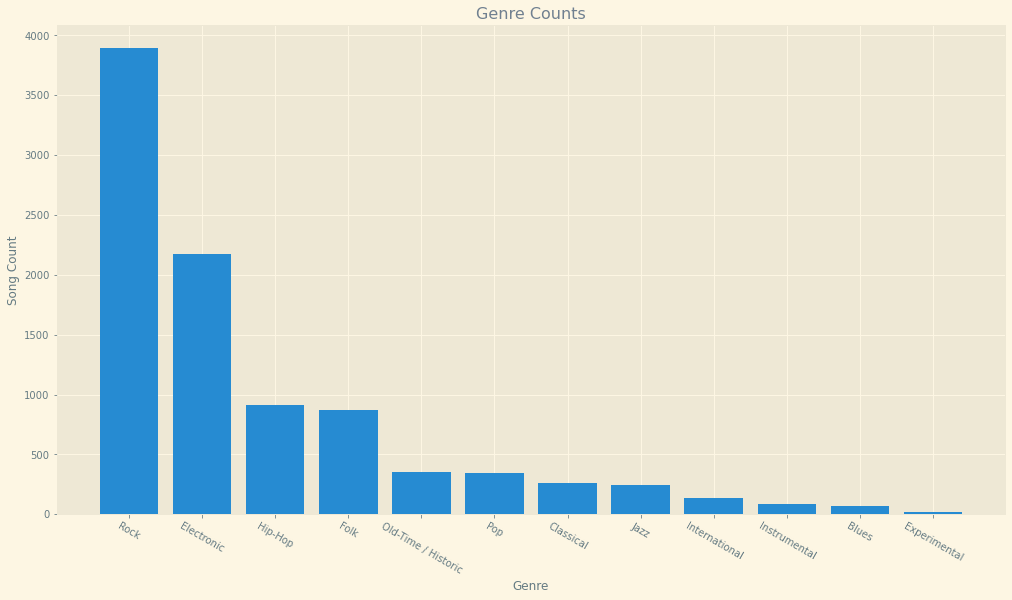

In [344]:
fig, ax = plt.subplots(figsize = (17,9))
ax.bar(echonest_tracks.track.genre_top.value_counts().index[echonest_tracks.track.genre_top.value_counts() > 0], echonest_tracks.track.genre_top.value_counts()[echonest_tracks.track.genre_top.value_counts() > 0])
ax.set_xticklabels(echonest_tracks.track.genre_top.value_counts().index[echonest_tracks.track.genre_top.value_counts() > 0], rotation = 330)
ax.set_title('Genre Counts', color = 'slategray')
ax.set_xlabel('Genre')
ax.set_ylabel('Song Count')
plt.savefig('img/Genre_Song_Counts', facecolor = 'papayawhip');

In [208]:
dfs = [hip_hop_df, rock_df, classical_df , pop_df, electronic_df, folk_df]
names = ['Hip-Hop', 'Rock', 'Classical', 'Pop', 'Electronic','Folk']

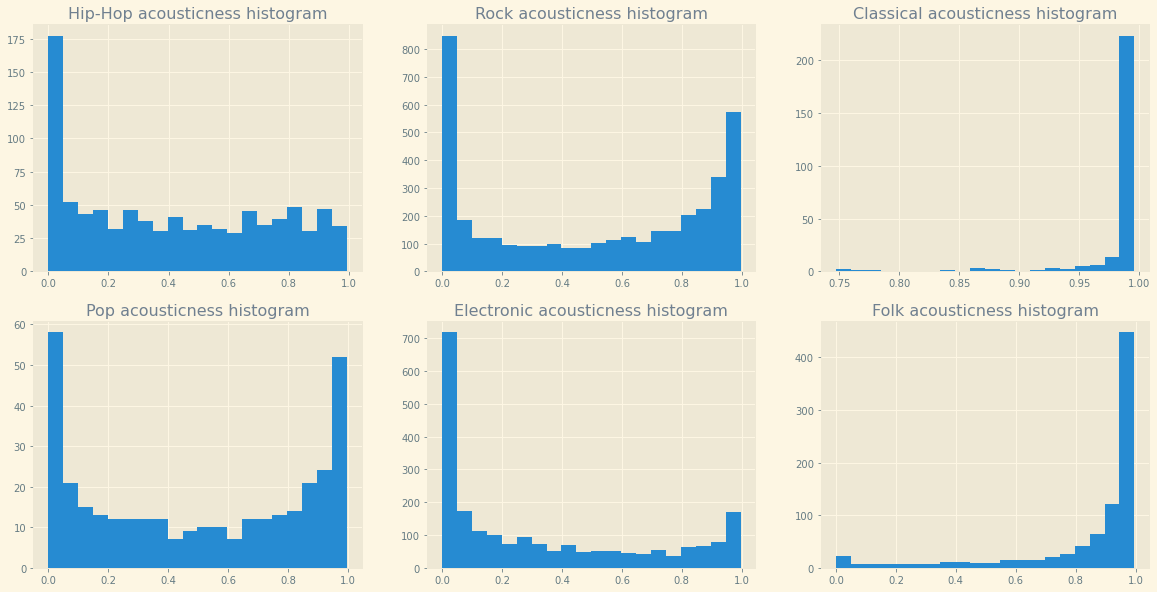

In [323]:
plot_genre_attribute_hist(dfs, 'acousticness', names)
plt.savefig('img/acousticness_by_genre',facecolor = 'papayawhip')

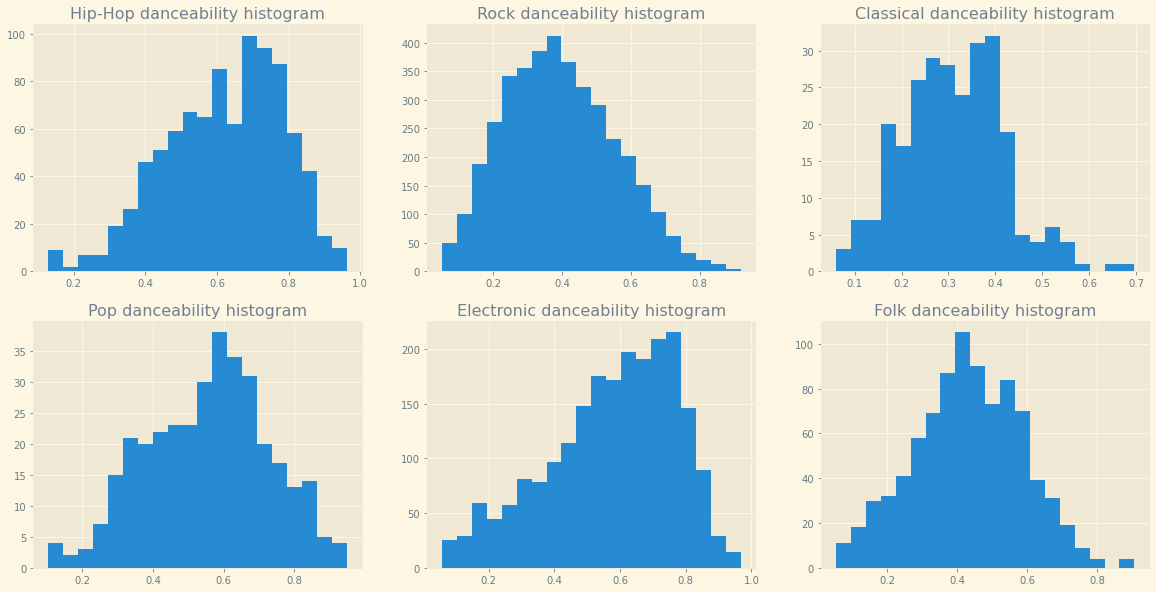

In [324]:
plot_genre_attribute_hist(dfs,'danceability', names)
plt.savefig('img/danceability_by_genre',facecolor = 'papayawhip')

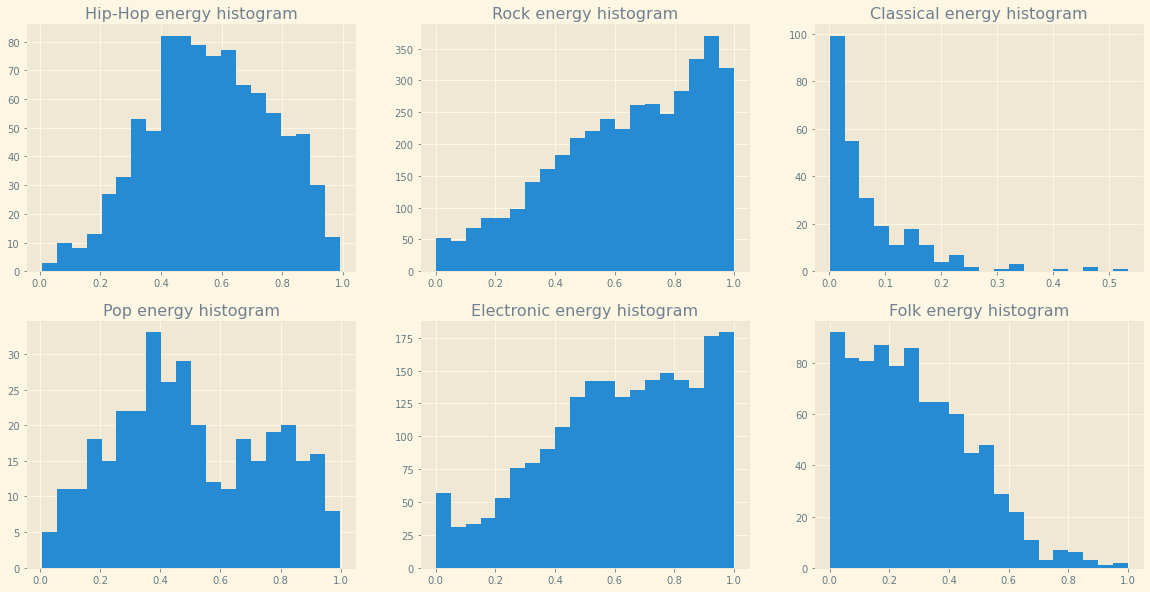

In [325]:
plot_genre_attribute_hist(dfs, 'energy', names)
plt.savefig('img/energy_by_genre',facecolor = 'papayawhip')

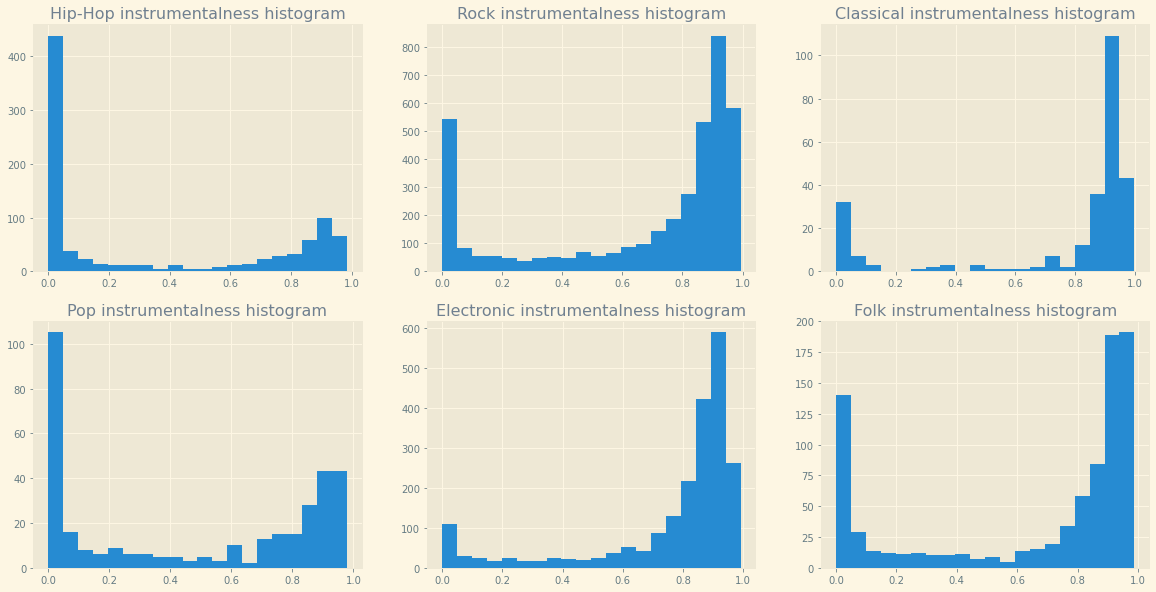

In [326]:
plot_genre_attribute_hist(dfs, 'instrumentalness', names)
plt.savefig('img/instrumentalness_by_genre',facecolor = 'papayawhip')

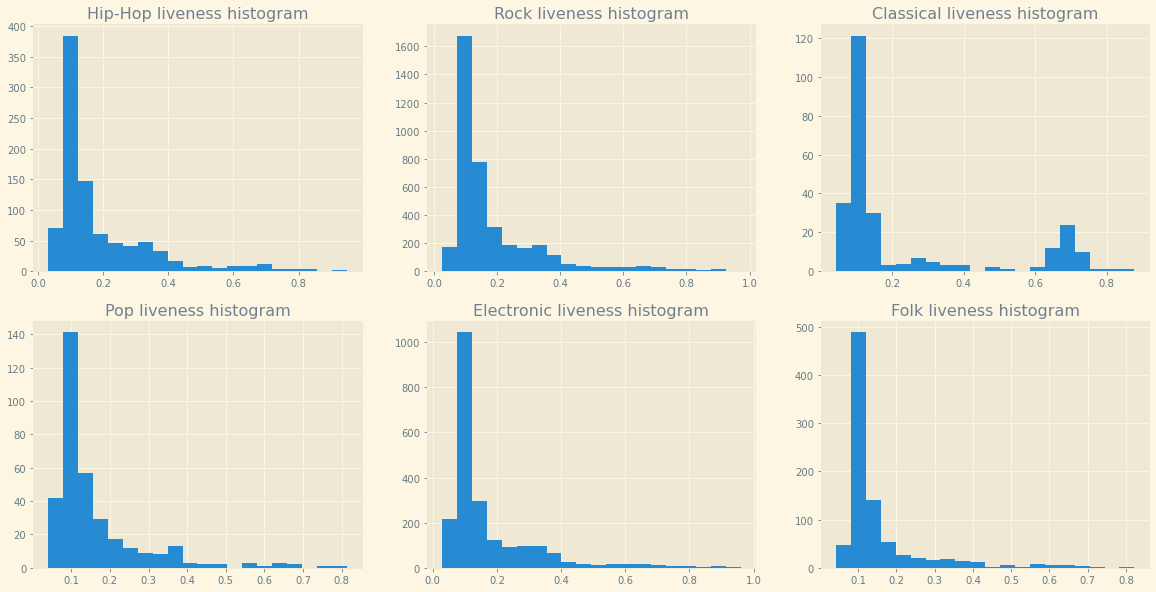

In [327]:
plot_genre_attribute_hist(dfs, 'liveness', names)
plt.savefig('img/liveness_by_genre',facecolor = 'papayawhip')

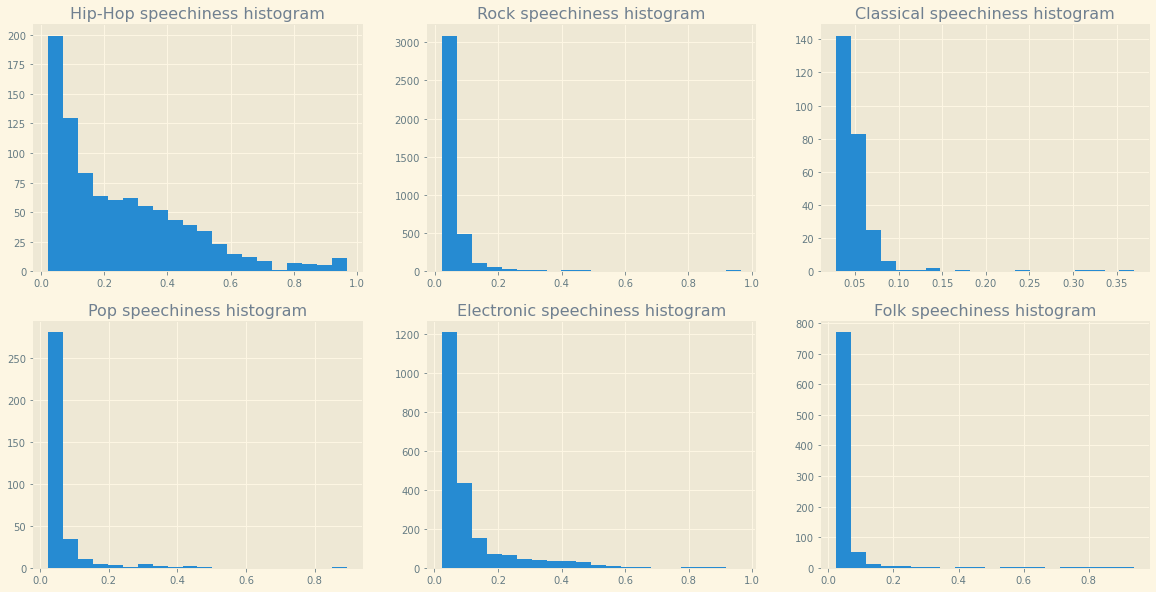

In [328]:
plot_genre_attribute_hist(dfs, 'speechiness', names)
plt.savefig('img/speechiness_by_genre',facecolor = 'papayawhip')

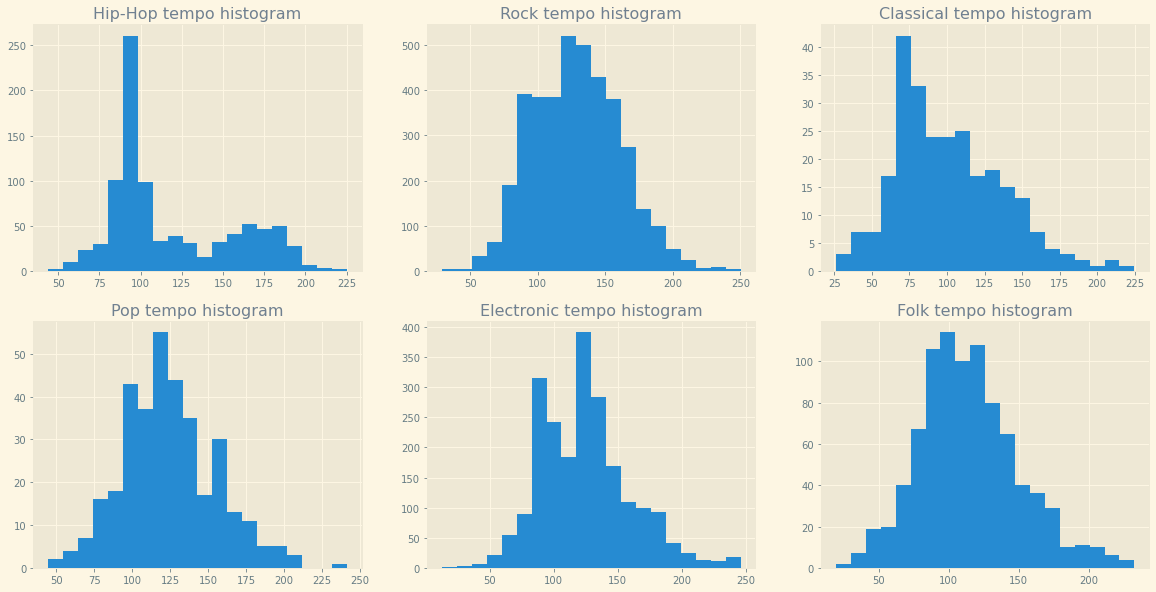

In [329]:
plot_genre_attribute_hist(dfs, 'tempo', names)
plt.savefig('img/tempo_by_genre',facecolor = 'papayawhip')

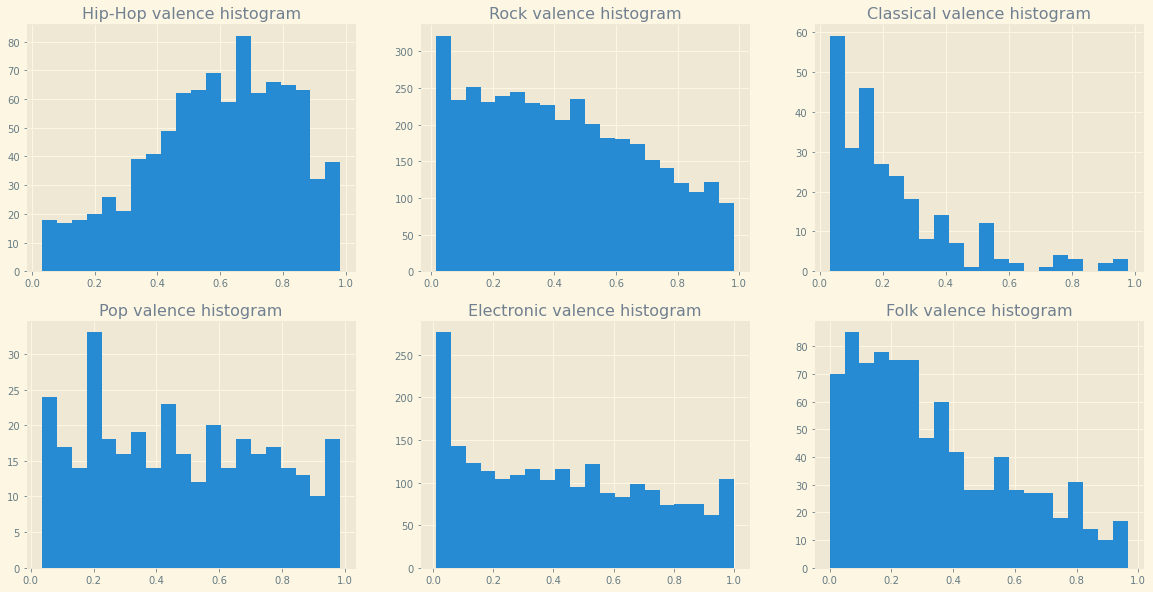

In [330]:
plot_genre_attribute_hist(dfs, 'valence', names)
plt.savefig('img/valence_by_genre',facecolor = 'papayawhip')

In [331]:
fig = go.Figure()
fig.add_trace(go.Histogram(x = pop_df.audio_features.acousticness))
fig.update_layout(barmode='overlay')
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
plt.savefig('img/pop_rock_electronic_hist')

<Figure size 432x288 with 0 Axes>

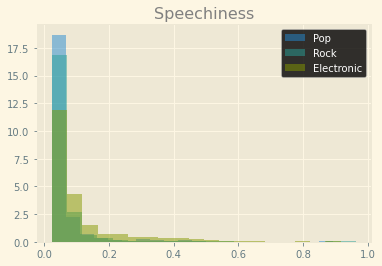

In [354]:

plt.hist(pop_df.audio_features.speechiness, bins = 20, alpha = 0.5, density = True, label = 'Pop')
plt.hist(rock_df.audio_features.speechiness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.speechiness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Speechiness', color = 'gray')
plt.savefig('img/Pop_speechiness', facecolor = 'papayawhip')

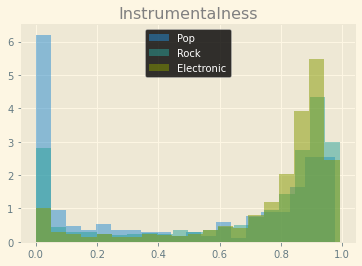

In [355]:
plt.hist(pop_df.audio_features.instrumentalness, bins = 20, alpha = 0.5, density = True, label = 'Pop')
plt.hist(rock_df.audio_features.instrumentalness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.instrumentalness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Instrumentalness', color = 'gray')
plt.savefig('img/Pop_instrumentalness', facecolor = 'papayawhip')

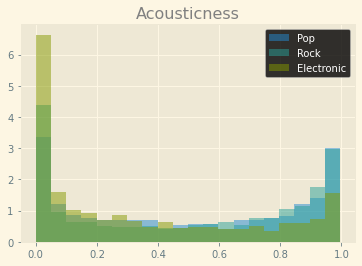

In [356]:
plt.hist(pop_df.audio_features.acousticness, bins = 20, alpha = 0.5, density = True, label = 'Pop')
plt.hist(rock_df.audio_features.acousticness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.acousticness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Acousticness', color = 'gray')
plt.savefig('img/Pop_acousticness', facecolor = 'papayawhip')

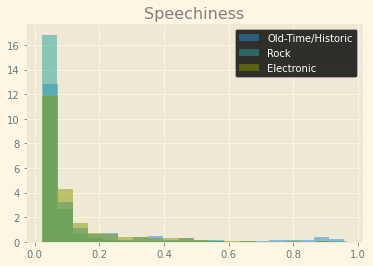

In [357]:
plt.hist(old_df.audio_features.speechiness, bins = 20, alpha = 0.5, density = True, label = 'Old-Time/Historic')
plt.hist(rock_df.audio_features.speechiness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.speechiness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Speechiness', color = 'gray')
plt.savefig('img/Old_speechiness', facecolor = 'papayawhip')

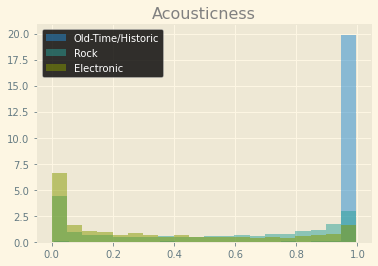

In [358]:
plt.hist(old_df.audio_features.acousticness, bins = 20, alpha = 0.5, density = True, label = 'Old-Time/Historic')
plt.hist(rock_df.audio_features.acousticness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.acousticness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Acousticness', color = 'gray')
plt.savefig('img/Old_acousticness', facecolor = 'papayawhip')

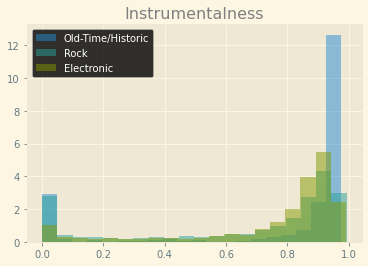

In [359]:
plt.hist(old_df.audio_features.instrumentalness, bins = 20, alpha = 0.5, density = True, label = 'Old-Time/Historic')
plt.hist(rock_df.audio_features.instrumentalness, bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.audio_features.instrumentalness, bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')
plt.title('Instrumentalness', color = 'gray')
plt.savefig('img/Old_instrumentalness', facecolor = 'papayawhip')

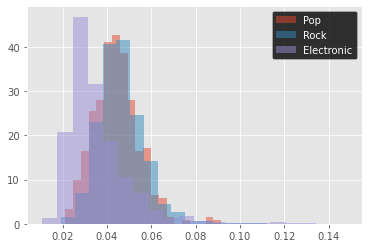

In [259]:
plt.hist(pop_df.temporal_features['201'][pop_df.temporal_features['201'] < 0.15], bins = 20, alpha = 0.5, density = True, label = 'Pop')
plt.hist(rock_df.temporal_features['201'][rock_df.temporal_features['201'] < 0.15], bins = 20, alpha = .5, density=True, label = 'Rock')
plt.hist(electronic_df.temporal_features['201'][electronic_df.temporal_features['201']<0.15], bins = 20, alpha = .5, density=True, label = 'Electronic')
plt.legend(facecolor = 'black')

In [257]:
(electronic_df.temporal_features['201'] > 0.5)

1